In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
import missingno as msno
import seaborn as sns

In [2]:
from google.colab import files
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!ls '/content/drive/MyDrive/MY_Learning/'

 daily_engagement.csv		   L1_Starter_Code.ipynb
 daily_engagement_full.csv	  'project_submissions (1).csv'
 enrollments.csv		   project_submissions.csv
'Features data set.csv'		  'sales data-set.csv'
 ipython_notebook_tutorial.ipynb  'stores data-set.csv'


In [37]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(dataframe, nGraphShown, nGraphPerRow):
    nunique = dataframe.nunique()
    dataframe = dataframe[[col for col in dataframe if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = dataframe.shape
    columnNames = list(dataframe)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columndataframe = dataframe.iloc[:, i]
        if (not np.issubdtype(type(columndataframe.iloc[0]), np.number)):
            valueCounts = columndataframe.value_counts()
            valueCounts.plot.bar()
        else:
            columndataframe.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# Correlation matrix
def plotCorrelationMatrix(dataframe, graphWidth):
    filename = dataframe.dataframeName
    dataframe = dataframe.dropna('columns') # drop columns with NaN
    dataframe = dataframe[[col for col in dataframe if dataframe[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if dataframe.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({dataframe.shape[1]}) is less than 2')
        return
    corr = dataframe.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(dataframe, plotSize, textSize):
    dataframe = dataframe.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to dataframe being singular
    dataframe = dataframe.dropna('columns')
    dataframe = dataframe[[col for col in dataframe if dataframe[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(dataframe)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    dataframe = dataframe[columnNames]
    ax = pd.plotting.scatter_matrix(dataframe, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = dataframe.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Features data set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
Features_data_set = pd.read_csv('/content/drive/MyDrive/MY_Learning/Features data set.csv', delimiter=',', nrows = nRowsRead)
Features_data_set.dataframeName = 'Features data set.csv'
nRow, nCol = Features_data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


In [7]:
Features_data_set.head(5)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sales data-set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
sales_data_set = pd.read_csv('/content/drive/MyDrive/MY_Learning/sales data-set.csv', delimiter=',', nrows = nRowsRead)
sales_data_set.dataframeName = 'sales data-set.csv'
nRow, nCol = sales_data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [9]:
sales_data_set.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# stores data-set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
stores_data_set = pd.read_csv('/content/drive/MyDrive/MY_Learning/stores data-set.csv', delimiter=',', nrows = nRowsRead)
stores_data_set.dataframeName = 'stores data-set.csv'
nRow, nCol = stores_data_set.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45 rows and 3 columns


In [11]:
stores_data_set.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


-------------------------------------------- Features_data_set --------------------------------------------


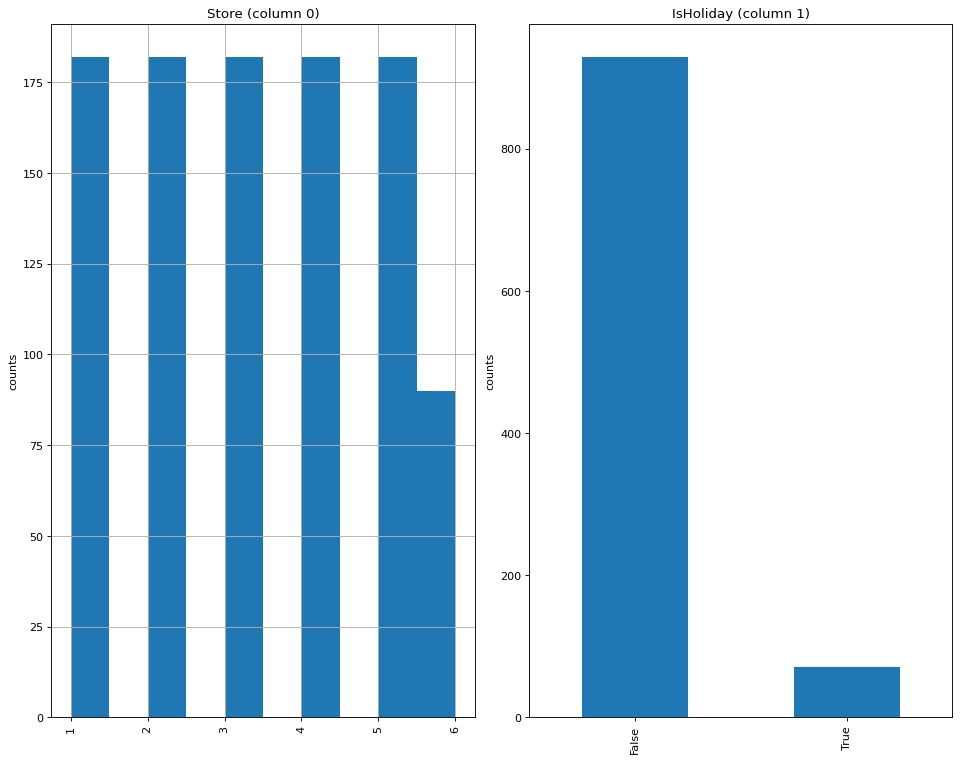

-------------------------------------------- sales_data_set --------------------------------------------


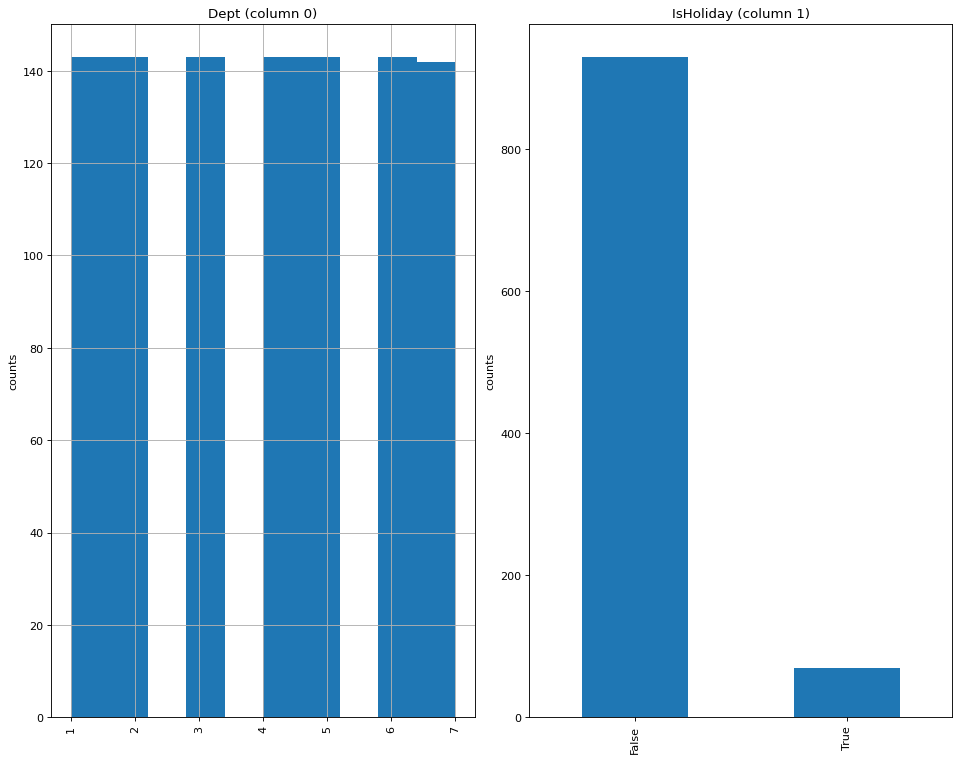

-------------------------------------------- stores_data_set --------------------------------------------


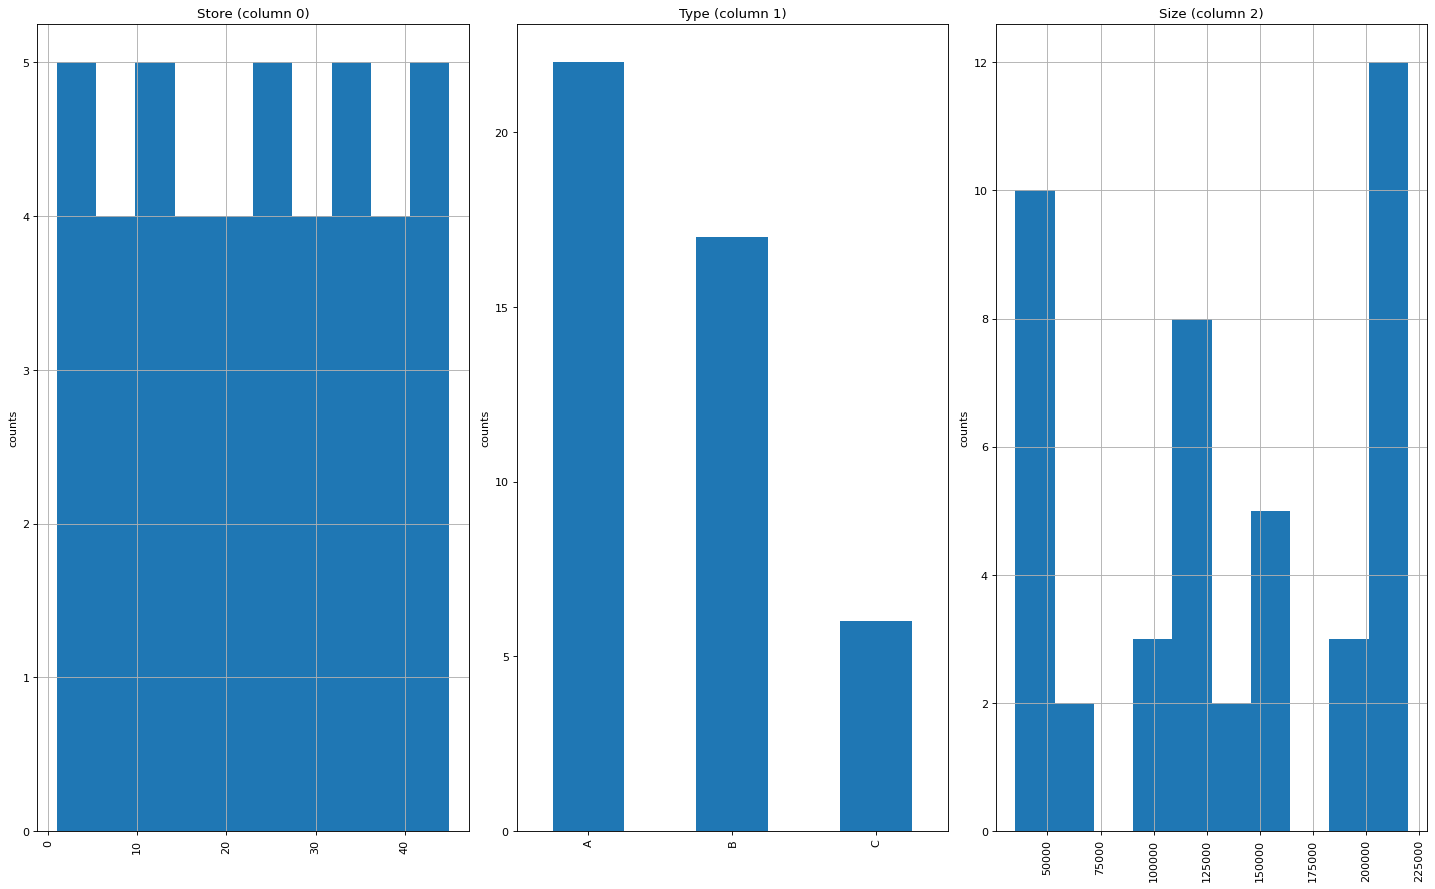

In [12]:
print("-------------------------------------------- Features_data_set --------------------------------------------")
plotPerColumnDistribution(Features_data_set, 10, 5)
print("-------------------------------------------- sales_data_set --------------------------------------------")
plotPerColumnDistribution(sales_data_set, 10, 5)
print("-------------------------------------------- stores_data_set --------------------------------------------")
plotPerColumnDistribution(stores_data_set, 10, 5)

-------------------------------------------- Features_data_set --------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


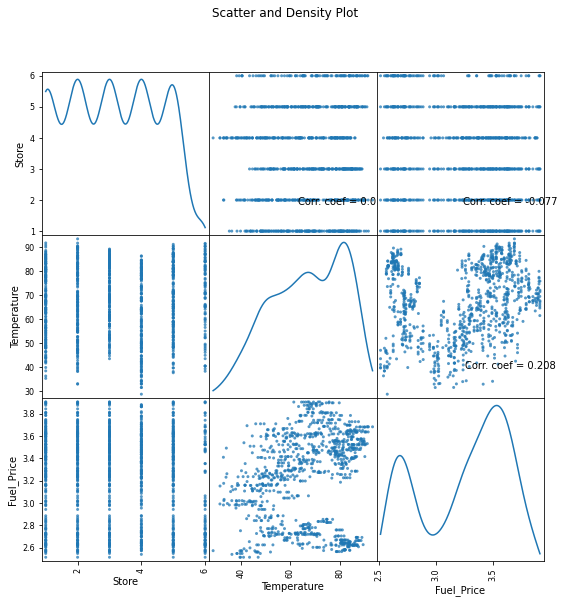

-------------------------------------------- sales_data_set --------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


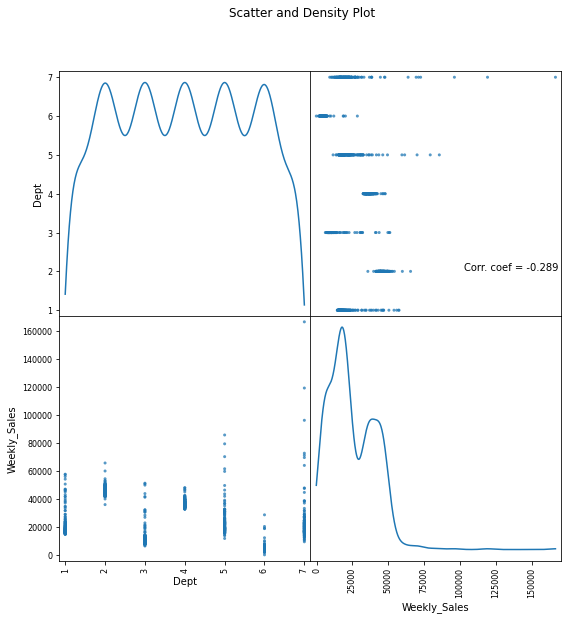

-------------------------------------------- stores_data_set --------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


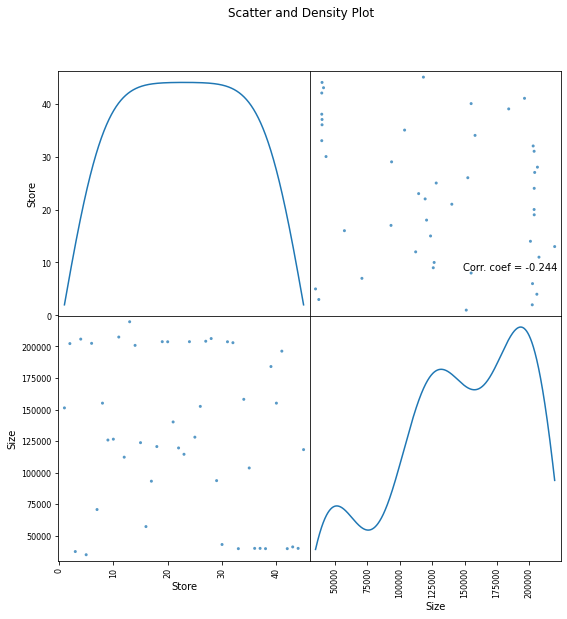

In [13]:
print("-------------------------------------------- Features_data_set --------------------------------------------")
plotScatterMatrix(Features_data_set, 9, 10)
print("-------------------------------------------- sales_data_set --------------------------------------------")
plotScatterMatrix(sales_data_set, 9, 10)
print("-------------------------------------------- stores_data_set --------------------------------------------")
plotScatterMatrix(stores_data_set, 9, 10)

-------------------------------------------- Features_data_set --------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


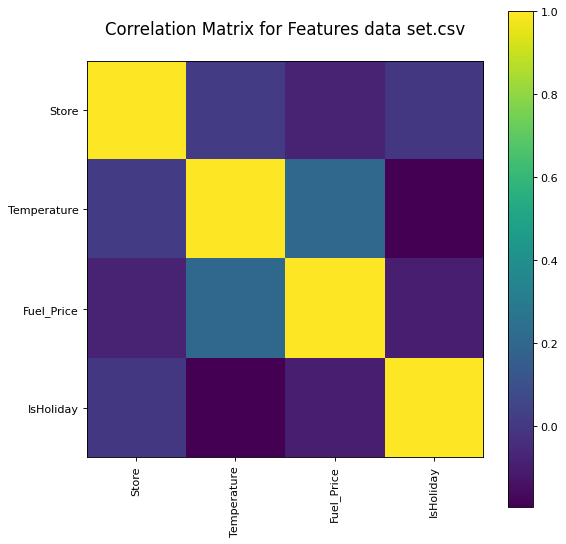

-------------------------------------------- sales_data_set --------------------------------------------


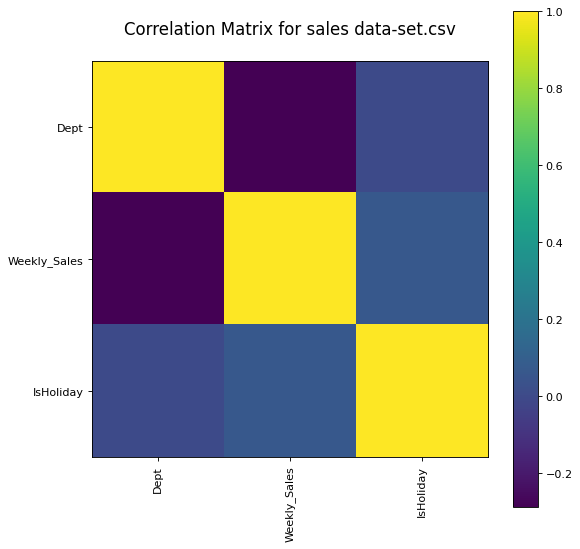

-------------------------------------------- stores_data_set --------------------------------------------


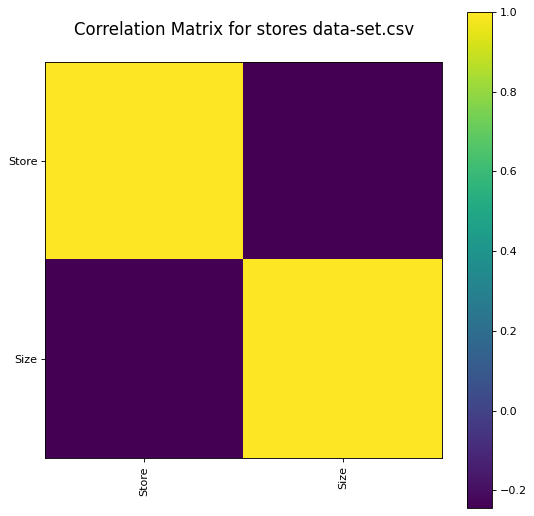

In [14]:
print("-------------------------------------------- Features_data_set --------------------------------------------")
plotCorrelationMatrix(Features_data_set, 8)
print("-------------------------------------------- sales_data_set --------------------------------------------")
plotCorrelationMatrix(sales_data_set, 8)
print("-------------------------------------------- stores_data_set --------------------------------------------")
plotCorrelationMatrix(stores_data_set, 8)

-------------------------------------------- Features_data_set --------------------------------------------


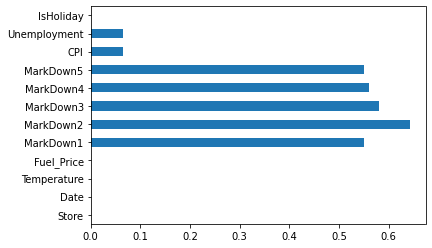

In [15]:
print("-------------------------------------------- Features_data_set --------------------------------------------")
Features_data_set.isnull().mean(axis=0).plot.barh()

In [16]:
Features_data_set.isnull().sum().sort_values(ascending=False)

MarkDown2       642
MarkDown3       580
MarkDown4       561
MarkDown1       550
MarkDown5       550
CPI              65
Unemployment     65
Store             0
Date              0
Temperature       0
Fuel_Price        0
IsHoliday         0
dtype: int64

In [17]:
print("-------------------------------------------- Features_data_set --------------------------------------------")
Features_data_set[Features_data_set.isnull().T.any().T].head()

-------------------------------------------- Features_data_set --------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
print("-------------------------------------------- sales_data_set --------------------------------------------")
sales_data_set[sales_data_set.isnull().T.any().T].head()

-------------------------------------------- sales_data_set --------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday


In [19]:
print("-------------------------------------------- stores_data_set --------------------------------------------")
stores_data_set[stores_data_set.isnull().T.any().T].head()

-------------------------------------------- stores_data_set --------------------------------------------


,Store,Type,Size


-------------------------------------------- sales_data_set --------------------------------------------


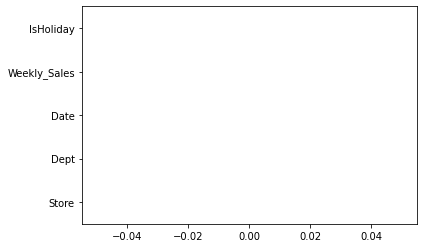

In [20]:
print("-------------------------------------------- sales_data_set --------------------------------------------")
sales_data_set.isnull().mean(axis=0).plot.barh()

-------------------------------------------- stores_data_set --------------------------------------------


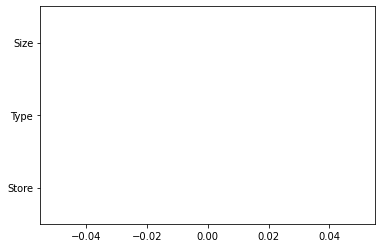

In [21]:
print("-------------------------------------------- stores_data_set --------------------------------------------")
stores_data_set.isnull().mean(axis=0).plot.barh()

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [23]:
print(Features_data_set.shape)
print(sales_data_set.shape)
print(stores_data_set.shape)

print("_________info________________")
print(Features_data_set.info())
print(sales_data_set.info())
print(stores_data_set.info())


(1000, 12)
(1000, 5)
(45, 3)
_________info________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1000 non-null   int64  
 1   Date          1000 non-null   object 
 2   Temperature   1000 non-null   float64
 3   Fuel_Price    1000 non-null   float64
 4   MarkDown1     450 non-null    float64
 5   MarkDown2     358 non-null    float64
 6   MarkDown3     420 non-null    float64
 7   MarkDown4     439 non-null    float64
 8   MarkDown5     450 non-null    float64
 9   CPI           935 non-null    float64
 10  Unemployment  935 non-null    float64
 11  IsHoliday     1000 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 87.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ---

In [24]:
'''Nunique Columns'''
print("----------------------------------- Features_data_set ----------------------------")
def num_of_unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
    
num_of_unique_counts(Features_data_set)

print("----------------------------------- sales_data_set ----------------------------")
'''Nunique Columns'''

def num_of_unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
    
num_of_unique_counts(sales_data_set)

print("----------------------------------- stores_data_set ----------------------------")

'''Nunique Columns'''

def num_of_unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
    
num_of_unique_counts(stores_data_set)

----------------------------------- Features_data_set ----------------------------
Store :  6
Date :  182
Temperature :  919
Fuel_Price :  308
MarkDown1 :  450
MarkDown2 :  349
MarkDown3 :  388
MarkDown4 :  437
MarkDown5 :  450
CPI :  925
Unemployment :  78
IsHoliday :  2
----------------------------------- sales_data_set ----------------------------
Store :  1
Dept :  7
Date :  143
Weekly_Sales :  1000
IsHoliday :  2
----------------------------------- stores_data_set ----------------------------
Store :  45
Type :  3
Size :  40


In [25]:
print("----------------------------------- Features_data_set ----------------------------")
print(Features_data_set['Store'].unique())
print("----------------------------------- sales_data_set ----------------------------")
print(sales_data_set['Store'].unique())
print(sales_data_set['Dept'].unique())
print("----------------------------------- stores_data_set ----------------------------")
print(stores_data_set['Type'].unique())

----------------------------------- Features_data_set ----------------------------
[1 2 3 4 5 6]
----------------------------------- sales_data_set ----------------------------
[1]
[1 2 3 4 5 6 7]
----------------------------------- stores_data_set ----------------------------
['A' 'B' 'C']


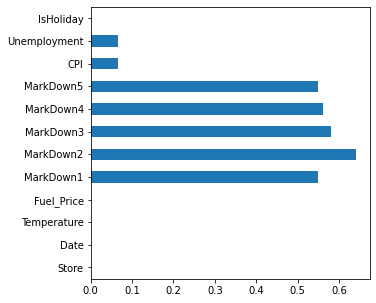

In [26]:
plt.figure(figsize=(5, 5))
Features_data_set.isnull().mean(axis=0).plot.barh()

----------------------------------- Features_data_set ----------------------------
MarkDown2       642
MarkDown3       580
MarkDown4       561
MarkDown1       550
MarkDown5       550
CPI              65
Unemployment     65
Store             0
Date              0
Temperature       0
Fuel_Price        0
IsHoliday         0
dtype: int64
----------------------------------- sales_data_set ----------------------------
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
----------------------------------- stores_data_set ----------------------------
Store    0
Type     0
Size     0
dtype: int64
Store           0.000
Date            0.000
Temperature     0.000
Fuel_Price      0.000
MarkDown1       0.550
MarkDown2       0.642
MarkDown3       0.580
MarkDown4       0.561
MarkDown5       0.550
CPI             0.065
Unemployment    0.065
IsHoliday       0.000
dtype: float64


Text(0.5, 1.0, 'Ratio of missing values per columns')

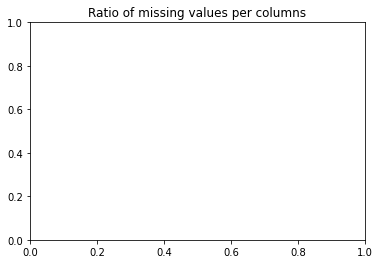

In [27]:
'''Missing Value Chart'''
print("----------------------------------- Features_data_set ----------------------------")
print(Features_data_set.isnull().sum().sort_values(ascending=False))
print("----------------------------------- sales_data_set ----------------------------")
print(sales_data_set.isnull().sum().sort_values(ascending=False))
print("----------------------------------- stores_data_set ----------------------------")
print(stores_data_set.isnull().sum().sort_values(ascending=False))

print(Features_data_set.isnull().mean(axis=0))
plt.title("Ratio of missing values per columns")

In [28]:
print('Dupplicate entries: {}'.format(Features_data_set.duplicated().sum()))
# Features_data_set.drop_duplicates(inplace = True)
print('Dupplicate entries: {}'.format(sales_data_set.duplicated().sum()))
print('Dupplicate entries: {}'.format(stores_data_set.duplicated().sum()))

Dupplicate entries: 0
Dupplicate entries: 0
Dupplicate entries: 0


In [29]:
Features_data_set.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,1000.000000,1000.000000,1000.000000,450.000000,358.000000,420.000000,439.000000,450.000000,935.000000,935.000000
mean,3.270000,67.061550,3.240612,7140.823889,3202.500782,1759.077357,3078.620137,3984.385889,201.746340,6.754904
std,1.599894,14.737859,0.398915,8637.532760,9409.329187,10634.145160,5958.488520,4161.248159,34.418684,1.062277
min,1.000000,28.840000,2.514000,41.740000,-35.740000,0.040000,4.000000,-185.170000,126.064000,3.879000
25%,2.000000,55.285000,2.826000,2460.507500,42.752500,6.627500,287.320000,1441.090000,211.277343,6.237000
50%,3.000000,68.095000,3.330500,4632.630000,269.675000,42.885000,1001.420000,2893.105000,215.136382,6.891000
75%,5.000000,80.355000,3.561500,8812.057500,1588.402500,185.907500,3529.035000,5128.382500,221.495772,7.567000
max,6.000000,93.340000,3.907000,75149.790000,92523.940000,105146.300000,48159.860000,36430.330000,228.729864,8.623000


In [30]:
sales_data_set.describe()

,Store,Dept,Weekly_Sales
count,1000.0,1000.000000,1000.000000
mean,1.0,3.997000,24625.494550
std,0.0,1.999747,16160.191742
min,1.0,1.000000,-139.650000
25%,1.0,2.000000,12386.077500
50%,1.0,4.000000,20405.960000
75%,1.0,6.000000,36912.142500
max,1.0,7.000000,166697.720000


In [31]:
stores_data_set.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [32]:
Features_data_set['Date'] = pd.to_datetime(Features_data_set['Date']) #datetime format
sales_data_set['Date'] = pd.to_datetime(sales_data_set['Date']) #datetime format
Features_data_set['Year'] = Features_data_set['Date'].dt.year # getting year
Features_data_set['Month'] = Features_data_set['Date'].dt.month # getting month
Features_data_set['Day'] = Features_data_set['Date'].dt.day # getting day

In [33]:
'''Equidistance Checking'''

data0 = Features_data_set.sort_values(by='Date')
data0['Time_Interval'] = data0.Date - data0.Date.shift(1)
data0[['Date', 'Time_Interval']].head()

print(f"{data0['Time_Interval'].value_counts().sort_values(ascending=False)}")

0 days     818
7 days      77
3 days      19
8 days      17
10 days     10
6 days       9
11 days      9
1 days       7
12 days      5
4 days       5
13 days      4
9 days       4
5 days       4
15 days      2
14 days      2
25 days      1
2 days       1
21 days      1
18 days      1
63 days      1
27 days      1
33 days      1
Name: Time_Interval, dtype: int64


In [34]:
print(Features_data_set['Date'].min(), Features_data_set['Date'].max())
print(sales_data_set['Date'].min(), sales_data_set['Date'].max())

2010-01-10 00:00:00 2013-12-07 00:00:00
2010-01-10 00:00:00 2012-12-10 00:00:00


In [1]:
pip install plotly --upgrade

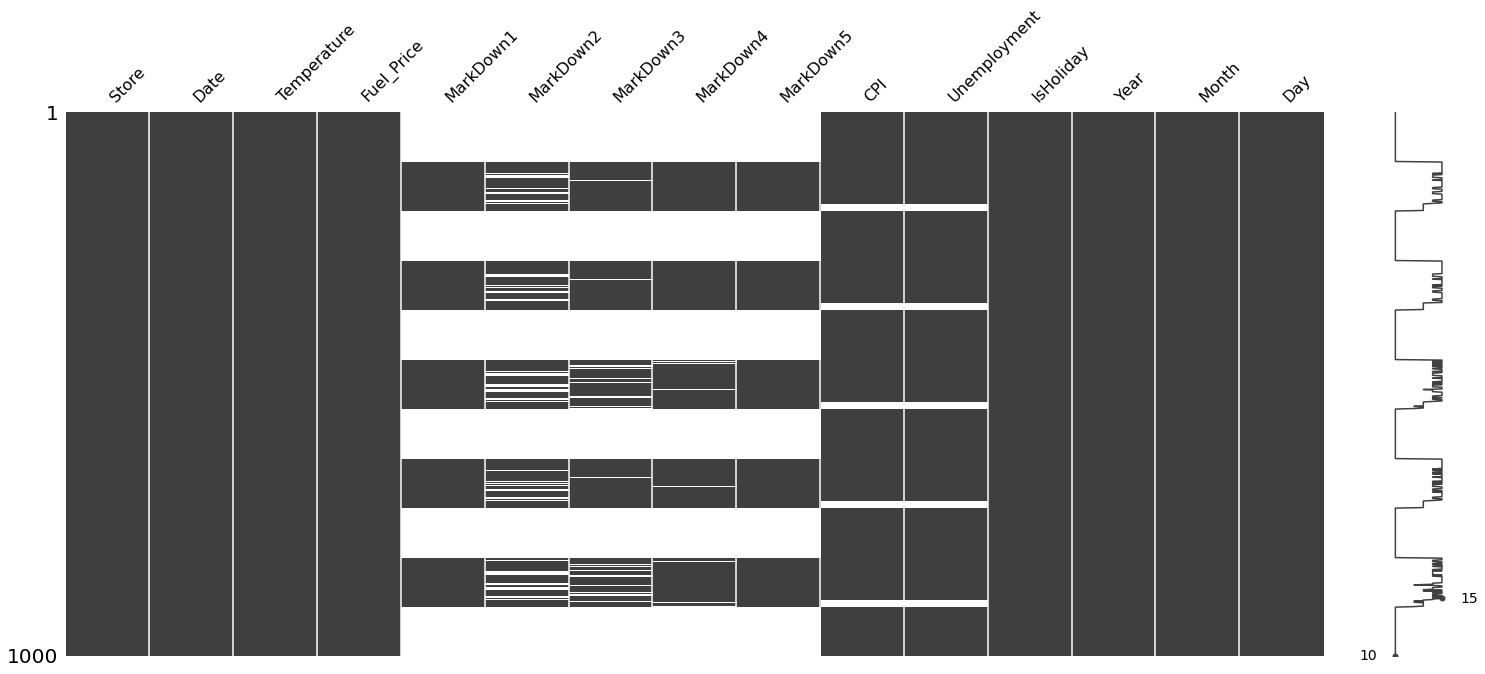

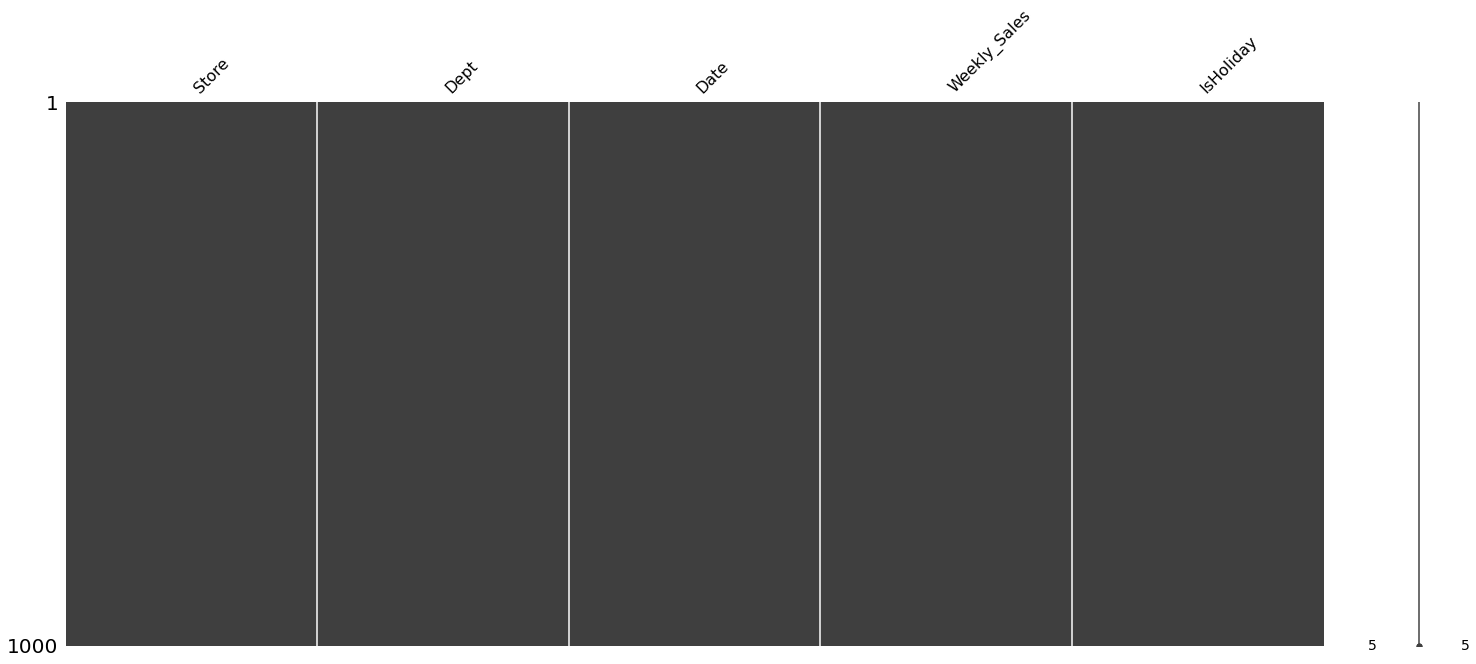

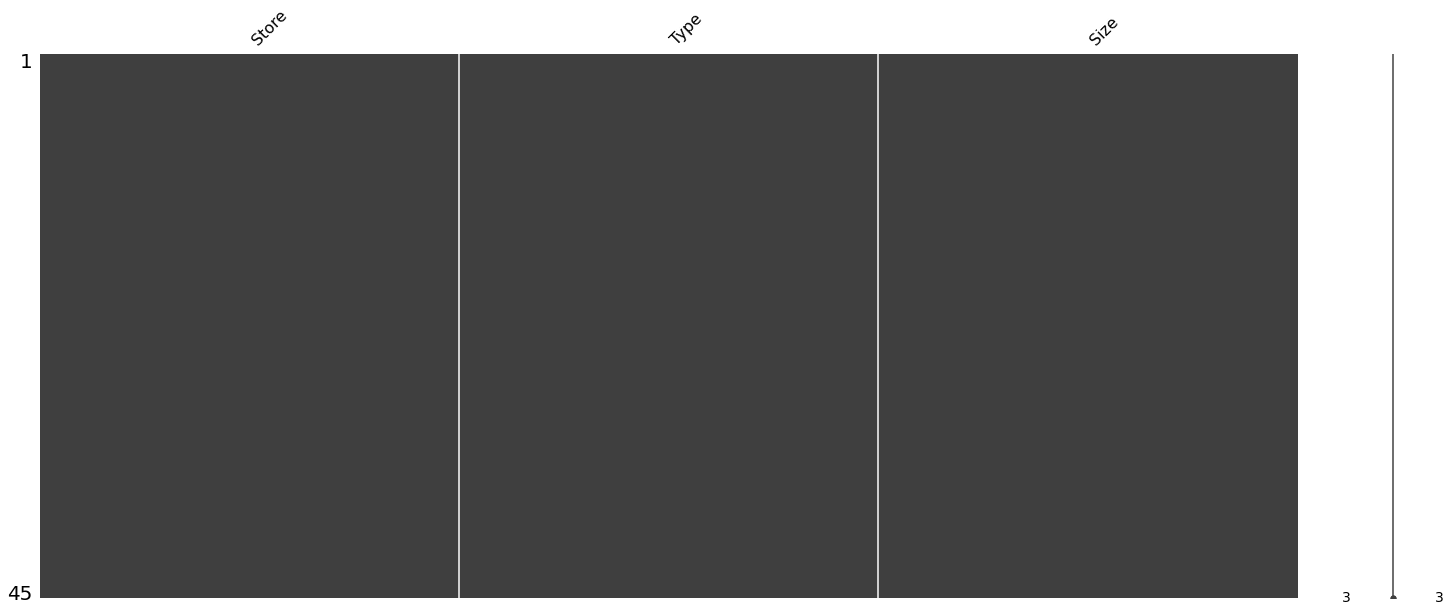

In [35]:
msno.matrix(Features_data_set)
msno.matrix(sales_data_set)
msno.matrix(stores_data_set)

In [38]:
dataframe=pd.merge(sales_data_set,Features_data_set, on=['Store','Date', 'IsHoliday'], how='left')

dataframe=pd.merge(dataframe,stores_data_set, on=['Store'], how='left')
print(dataframe.head(5))

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     1 2010-12-02      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-05-03      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  Year  Month  Day Type    Size  
0         8.106  2010      5    2    A  151

In [39]:
dataframe.isna().sum()

Store             0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1       644
MarkDown2       707
MarkDown3       651
MarkDown4       644
MarkDown5       644
CPI               0
Unemployment      0
Year              0
Month             0
Day               0
Type              0
Size              0
dtype: int64

In [40]:
dataframe = dataframe.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5', 'Size'],axis = 1)

In [41]:
dataframe.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
Type            0
dtype: int64

In [42]:
dataframe.duplicated().sum()

0

In [43]:
dataframe.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Type
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,2010,5,2,A
1,1,1,2010-12-02,46039.49,True,38.51,2.548,211.242170,8.106,2010,12,2,A
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,2010,2,19,A
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,2010,2,26,A
4,1,1,2010-05-03,21827.90,False,46.50,2.625,211.350143,8.106,2010,5,3,A


In [44]:
#temperature unit conversion
dataframe['Temperature'] = (dataframe['Temperature']- 32) * 5./9.

#factorize (Yes/No to 1/0 conversion)
holidays_factor, types =dataframe['IsHoliday'].factorize()
dataframe['IsHoliday'] = holidays_factor

dataframe.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Type
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,211.096358,8.106,2010,5,2,A
1,1,1,2010-12-02,46039.49,1,3.616667,2.548,211.242170,8.106,2010,12,2,A
2,1,1,2010-02-19,41595.55,0,4.405556,2.514,211.289143,8.106,2010,2,19,A
3,1,1,2010-02-26,19403.54,0,8.127778,2.561,211.319643,8.106,2010,2,26,A
4,1,1,2010-05-03,21827.90,0,8.055556,2.625,211.350143,8.106,2010,5,3,A


In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1000 non-null   int64         
 1   Dept          1000 non-null   int64         
 2   Date          1000 non-null   datetime64[ns]
 3   Weekly_Sales  1000 non-null   float64       
 4   IsHoliday     1000 non-null   int64         
 5   Temperature   1000 non-null   float64       
 6   Fuel_Price    1000 non-null   float64       
 7   CPI           1000 non-null   float64       
 8   Unemployment  1000 non-null   float64       
 9   Year          1000 non-null   int64         
 10  Month         1000 non-null   int64         
 11  Day           1000 non-null   int64         
 12  Type          1000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 109.4+ KB


In [46]:
dataframe.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.0,3.997000,24625.494550,0.070000,20.169961,3.219413,215.989444,7.611457,2010.964000,6.472000,15.640000
std,0.0,1.999747,16160.191742,0.255275,7.897086,0.426145,4.333581,0.381376,0.797082,3.322989,8.755859
min,1.0,1.000000,-139.650000,0.000000,1.888889,2.514000,210.337426,6.573000,2010.000000,1.000000,1.000000
25%,1.0,2.000000,12386.077500,0.000000,14.327778,2.759000,211.531248,7.348000,2010.000000,4.000000,8.000000
50%,1.0,4.000000,20405.960000,0.000000,20.911111,3.290000,215.459905,7.787000,2011.000000,6.000000,16.000000
75%,1.0,6.000000,36912.142500,0.000000,26.938889,3.594000,220.636902,7.838000,2012.000000,9.000000,23.000000
max,1.0,7.000000,166697.720000,1.000000,33.138889,3.907000,223.444251,8.106000,2012.000000,12.000000,31.000000


In [47]:
dataframe['M'] = dataframe['Date'].dt.month

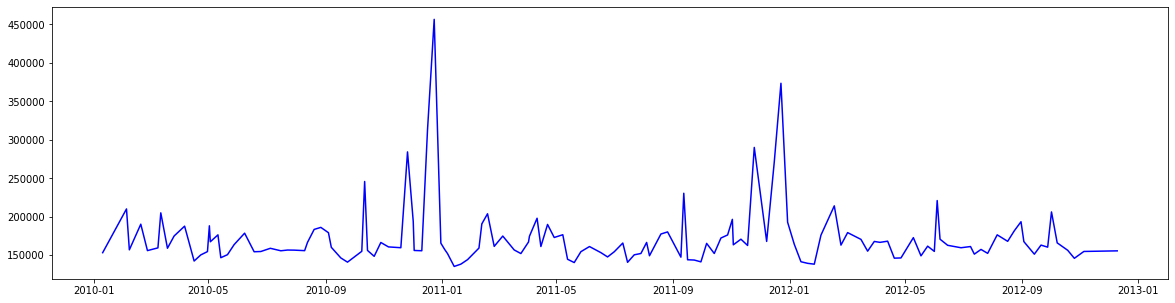

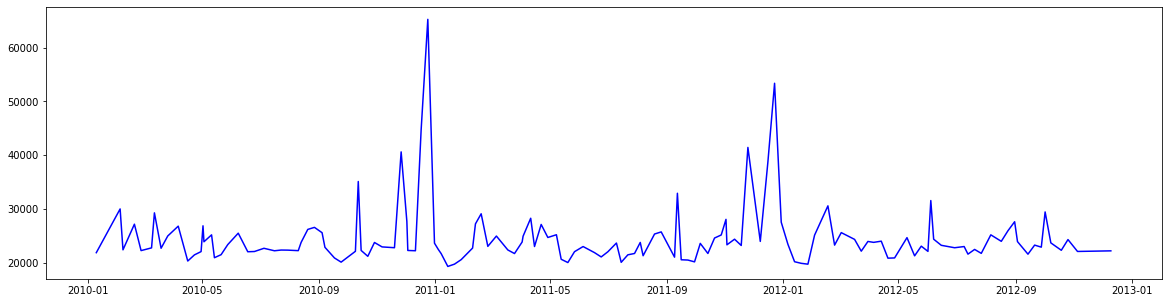

In [48]:
dataframe_average_sales_weekly = dataframe.groupby('Date', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})

dataframe_average_sales_sorted = dataframe_average_sales_weekly.sort_values('Weekly_Sales', ascending = False)

plt.figure(figsize=(20,5))

plt.plot(dataframe_average_sales_weekly.Date, dataframe_average_sales_weekly.Weekly_Sales, color = 'b')

plt.show()


dataframe_average_sales_weekly = dataframe.groupby('Date', as_index=False)\
    .agg({'Weekly_Sales': 'mean'})

dataframe_average_sales_sorted = dataframe_average_sales_weekly.sort_values('Weekly_Sales', ascending = False)

plt.figure(figsize=(20,5))

plt.plot(dataframe_average_sales_weekly.Date, dataframe_average_sales_weekly.Weekly_Sales, color = 'b')

plt.show()

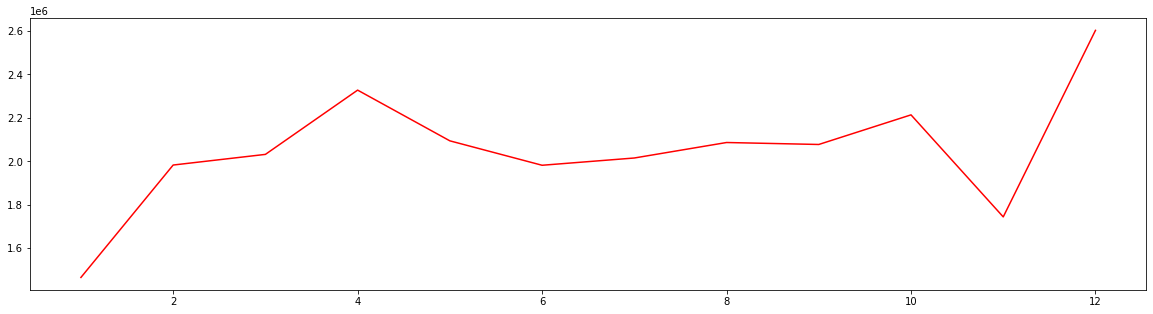

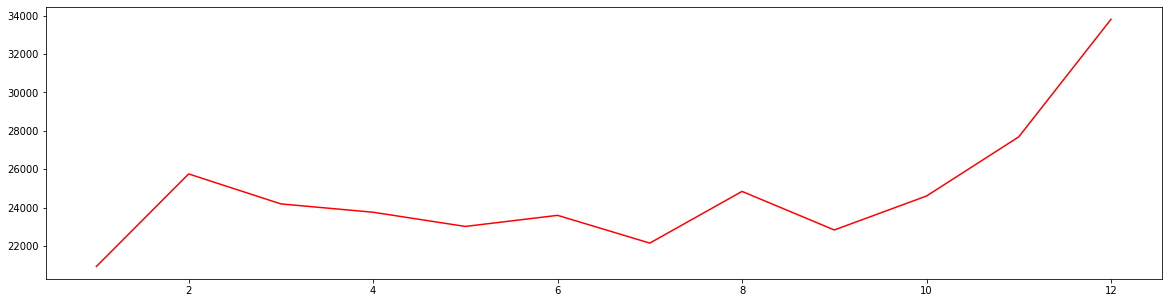

In [49]:
dataframe_average_sales_monthly = dataframe.groupby('M', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(20,5))
plt.plot(dataframe_average_sales_monthly.M, dataframe_average_sales_monthly.Weekly_Sales, color = 'r')
plt.show()

dataframe_average_sales_monthly = dataframe.groupby('M', as_index=False)\
    .agg({'Weekly_Sales': 'mean'})
plt.figure(figsize=(20,5))
plt.plot(dataframe_average_sales_monthly.M, dataframe_average_sales_monthly.Weekly_Sales, color = 'r')
plt.show()

In [50]:
dataframe_average_sales_sorted.head()

,Date,Weekly_Sales
46,2010-12-24,65237.924286
98,2011-12-23,53367.857143
45,2010-12-17,44746.157143
95,2011-11-25,41453.408571
41,2010-11-26,40623.994286


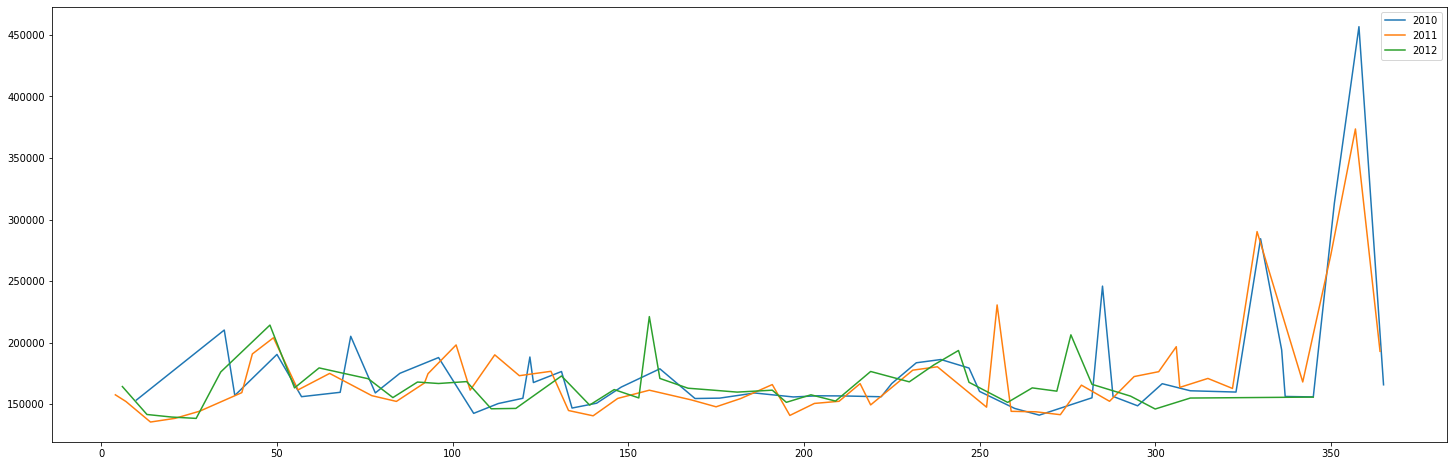

In [51]:
dataframe['Y'] = dataframe['Date'].dt.year
dataframe['D'] = dataframe['Date'].dt.dayofyear
Features_data_set0 = dataframe.query('Y == 2010').groupby('D', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})
Features_data_set1 = dataframe.query('Y == 2011').groupby('D', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})
Features_data_set2 = dataframe.query('Y == 2012').groupby('D', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})
fig, ax = plt.subplots(figsize=(25,8))
ax.plot(Features_data_set0.D, Features_data_set0.Weekly_Sales, label = "2010")
ax.plot(Features_data_set1.D, Features_data_set1.Weekly_Sales, label = "2011")
ax.plot(Features_data_set2.D, Features_data_set2.Weekly_Sales, label = "2012")
ax.legend()
plt.show()

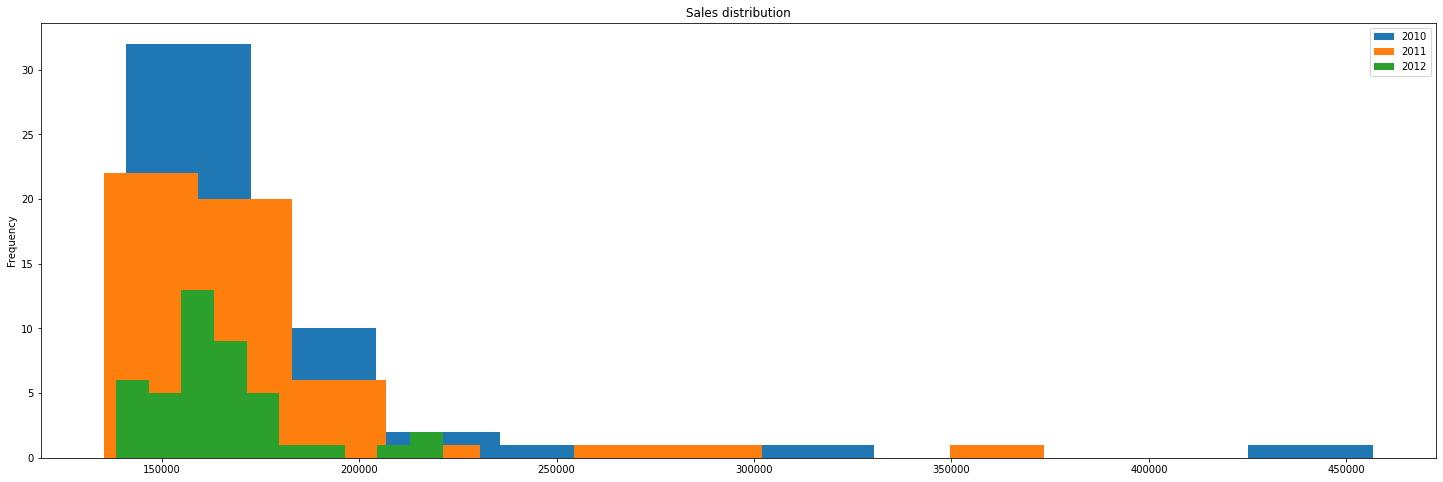

In [52]:
# Sales sums distribution

fig, ax = plt.subplots(figsize=(25,8))

Features_data_set0['Weekly_Sales'].plot(kind='hist', title='Sales distribution', label = "2010");

Features_data_set1['Weekly_Sales'].plot(kind='hist', label = "2011");
Features_data_set2['Weekly_Sales'].plot(kind='hist', label = "2012");

ax.legend()
plt.show()

In [53]:
dataframe_average_sales_weekly['Date'].tail(5)

138   2012-10-08
139   2012-10-19
140   2012-10-26
141   2012-11-05
142   2012-12-10
Name: Date, dtype: datetime64[ns]

In [54]:
dataframe_average_sales_weekly['rol_month'] = dataframe_average_sales_weekly['Weekly_Sales'].rolling(4).mean()

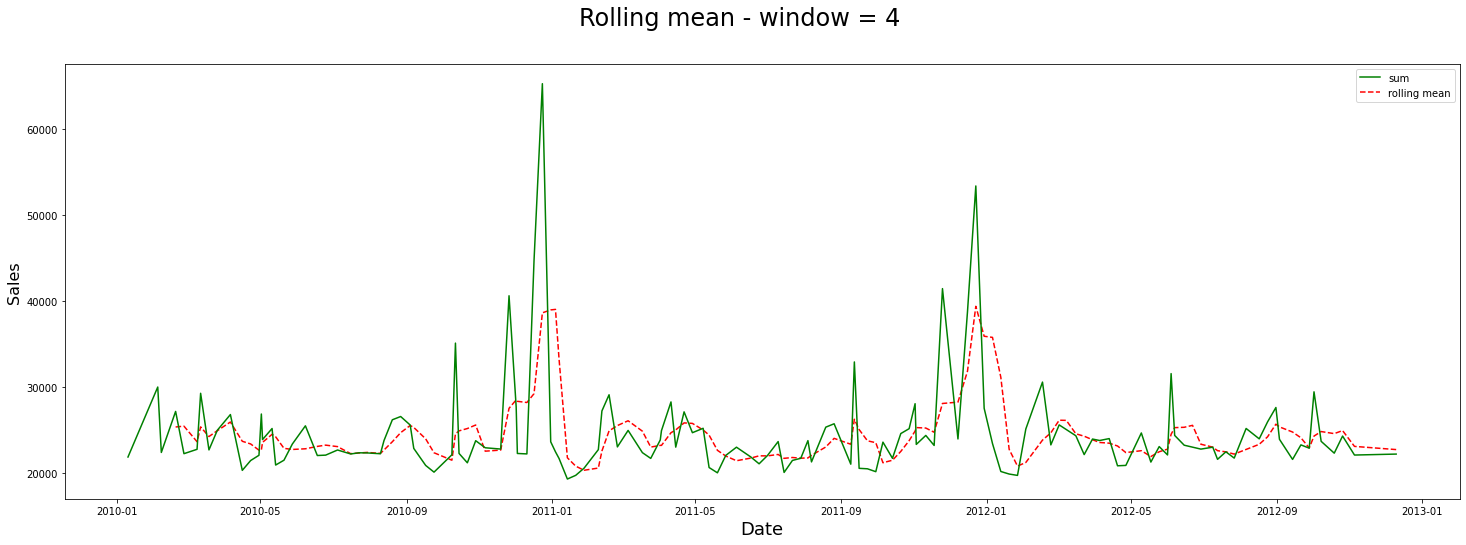

In [55]:
fig = plt.figure(figsize=(25,8))
line1, = plt.plot(dataframe_average_sales_weekly.Date, dataframe_average_sales_weekly.rol_month, '--', color='red')
line2, = plt.plot(dataframe_average_sales_weekly.Date, dataframe_average_sales_weekly.Weekly_Sales,  color='green')

fig.suptitle('Rolling mean - window = 4', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales', fontsize=16)

plt.legend((line2, line1), ['sum', 'rolling mean'])



plt.show()

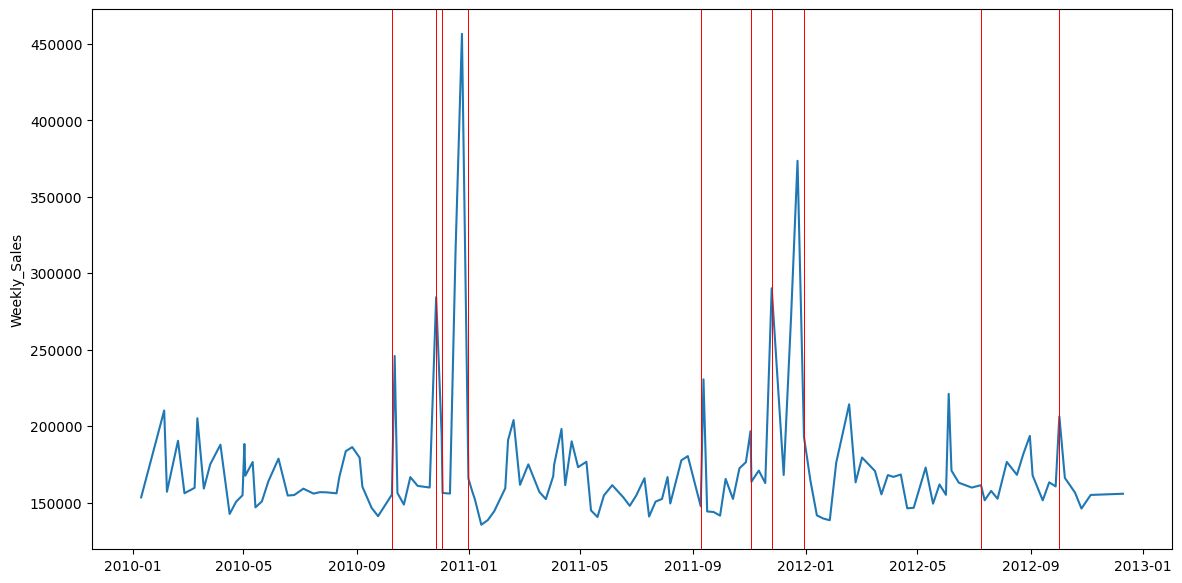

In [56]:
# holiday weeks are marked with red lines
sales_data_set=dataframe.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
f_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_ylabel('Weekly_Sales')
ax_1.plot(sales_data_set['Date'], sales_data_set['Weekly_Sales'])

for x in dataframe[dataframe['IsHoliday']==1]['Date']:
    ax_1.axvline(x=x, color='red', linewidth=0.5)

In [57]:
dataframe_SW = dataframe.groupby('D', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})

dataframe_SW['differ'] = dataframe_SW['Weekly_Sales'].diff()

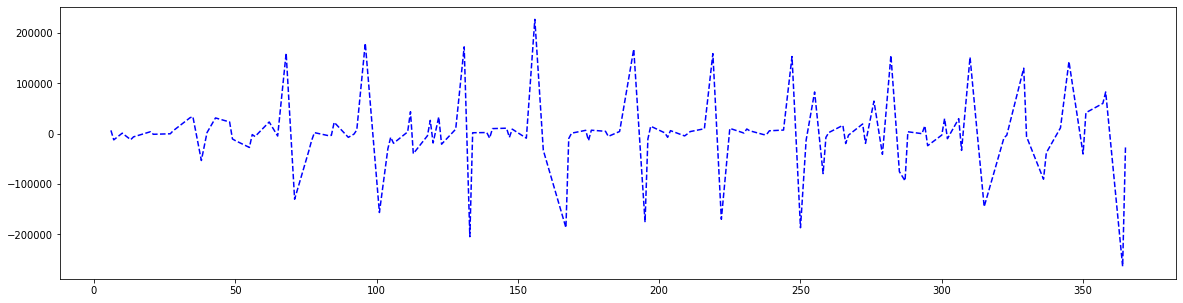

In [58]:
plt.figure(figsize=(20,5))
plt.plot(dataframe_SW.D, dataframe_SW.differ, '--', color = 'b')
plt.show()

In [59]:
dataframe_SW2 = dataframe.groupby('Date', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})

dataframe_SW2['differ'] = dataframe_SW2['Weekly_Sales'].diff()

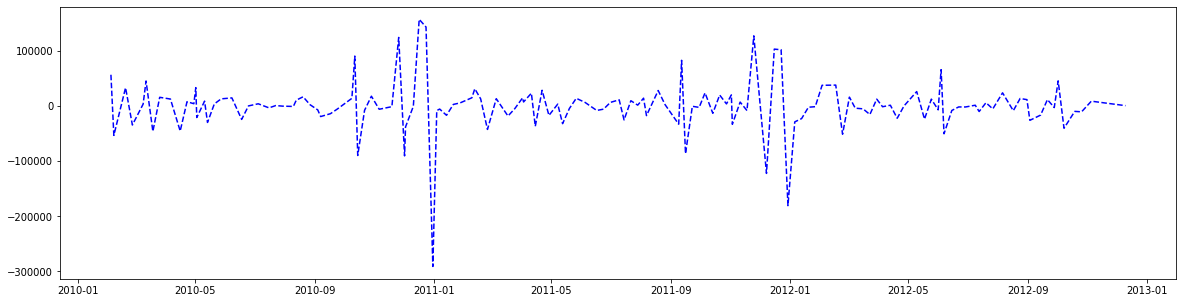

In [60]:
plt.figure(figsize=(20,5))
plt.plot(dataframe_SW2.Date, dataframe_SW2.differ, '--', color = 'b')
plt.show()

In [61]:
dataframe['Type'].unique()

array(['A'], dtype=object)

In [62]:
dataframe_type = dataframe.groupby('Type', as_index=False).agg(Mean=('Weekly_Sales', 'mean'), Sum=('Weekly_Sales', 'sum'))
dataframe_type

,Type,Mean,Sum
0,A,24625.49455,24625494.55


Text(0.5, 1.0, 'Mean weekly sales by years')

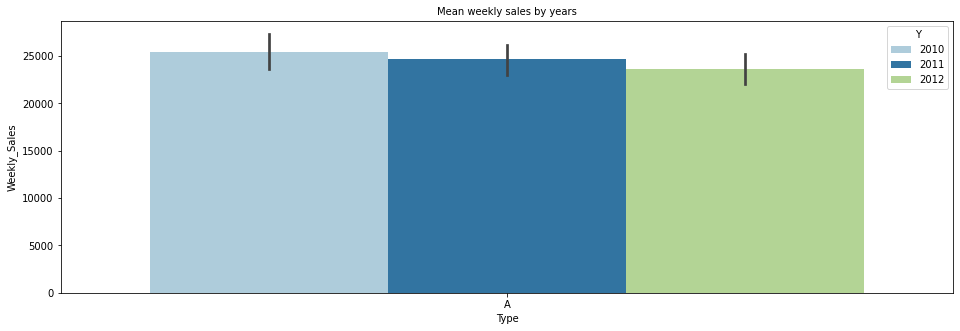

In [63]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x="Type", y="Weekly_Sales", hue="Y", data=dataframe, palette= "Paired")
ax.set_title('Mean weekly sales by years',fontsize=10)

In [64]:
dataframe_gr_type = dataframe.groupby('Type', as_index = False)\
    .agg({'Weekly_Sales':'mean'})\
    .sort_values('Weekly_Sales', ascending = False)

In [65]:
dataframe_gr_type

,Type,Weekly_Sales
0,A,24625.49455


In [66]:
dataframe_gr = dataframe.groupby('Store', as_index = False)\
    .agg({'Weekly_Sales':'sum'})\
    .sort_values('Weekly_Sales', ascending = False)

In [67]:
dataframe_gr.head(5)

,Store,Weekly_Sales
0,1,24625494.55


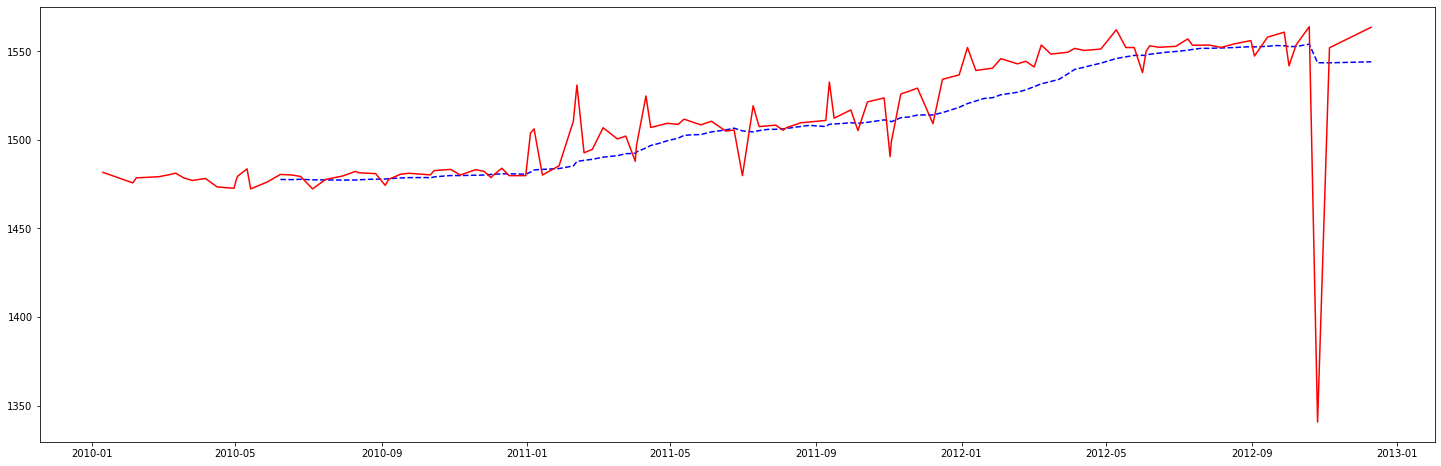

In [68]:
fig = plt.figure(figsize=(25,8))
dataframe_average_sales_weekly2 = dataframe.groupby('Date', as_index=False)\
    .agg({'CPI': 'sum'})
dataframe_average_sales_sorted = dataframe_average_sales_weekly2.sort_values('CPI', ascending = False)


dataframe_average_sales_weekly2['rol_month'] = dataframe_average_sales_weekly2['CPI'].rolling(20).mean()
line1 = plt.plot(dataframe_average_sales_weekly2.Date, dataframe_average_sales_weekly2.rol_month, '--', color='b')


plt.plot(dataframe_average_sales_weekly2.Date, dataframe_average_sales_weekly2.CPI, color = 'r')
plt.show()

In [69]:
dataframe_gr_cpi = dataframe.groupby('Y', as_index = False)\
    .agg({'CPI':'mean'})\
    .sort_values('CPI', ascending = False)

In [70]:
dataframe_gr_cpi

,Y,CPI
2,2012,221.649379
1,2011,215.648064
0,2010,211.305760


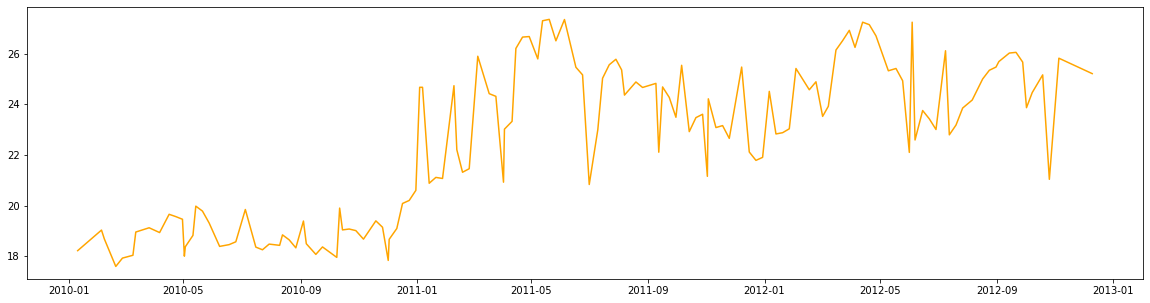

In [71]:
dataframe_average_sales_weekly2 = dataframe.groupby('Date', as_index=False)\
    .agg({'Fuel_Price': 'sum'})
dataframe_average_sales_sorted = dataframe_average_sales_weekly2.sort_values('Fuel_Price', ascending = False)

plt.figure(figsize=(20,5))
plt.plot(dataframe_average_sales_weekly2.Date, dataframe_average_sales_weekly2.Fuel_Price, color = 'orange')
plt.show()

In [72]:
dataframe.shape

(1000, 16)

In [85]:
labels=["less than -10 deg", "-10-0", "0-10", "10-15", "15-20", "20-25", "more than 25"]
bins=[-np.inf,-10,0,10,15,20,25, np.inf]
dataframe['temperature_category'] = pd.cut(dataframe['Temperature'], bins=bins, labels=labels,right=False)

In [86]:
dataframe_gr_t = dataframe.groupby('temperature_category', as_index = False)\
    .agg({'Weekly_Sales':'sum'})\
    .sort_values('Weekly_Sales', ascending = False)

In [87]:
dataframe_gr_t

,temperature_category,Weekly_Sales
6,more than 25,8281274.17
4,15-20,4956691.68
2,0-10,4467982.14
5,20-25,4010834.90
3,10-15,2908711.66
0,less than -10 deg,0.00
1,-10-0,0.00


In [88]:
data_tab = dataframe['temperature_category'].value_counts()

In [89]:
data_tab

more than 25         357
15-20                203
20-25                174
0-10                 161
10-15                105
less than -10 deg      0
-10-0                  0
Name: temperature_category, dtype: int64

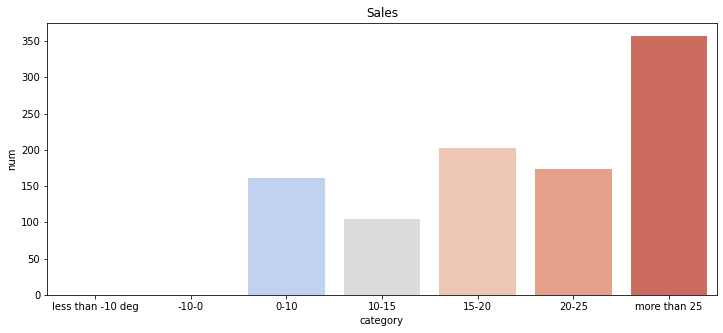

In [90]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="temperature_category", data=dataframe, palette="coolwarm")
ax.set(xlabel="category", ylabel = "num", title="Sales")
vals = ax.get_yticks()

In [91]:
sales_data_set0=dataframe.where( dataframe['Store'] == 20)
sales_data_set0=sales_data_set0.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'IsHoliday', 'Weekly_Sales']].mean()
sales_data_set0 = sales_data_set0.set_index('Date')
sales_data_set0.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
Date,,,,,,


In [92]:
corrMatrix20 = sales_data_set0.corr()

In [93]:
corrMatrix20

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
Temperature,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Price,NaN,NaN,NaN,NaN,NaN,NaN
CPI,NaN,NaN,NaN,NaN,NaN,NaN
Unemployment,NaN,NaN,NaN,NaN,NaN,NaN
IsHoliday,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,NaN,NaN,NaN,NaN,NaN
